##Practical 8: K-means Algorithm

### Snehal Rakas
### Roll No 12

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Mall_Customers.xls")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))
gender_mapping = {'Male': 0, 'Female': 1}


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

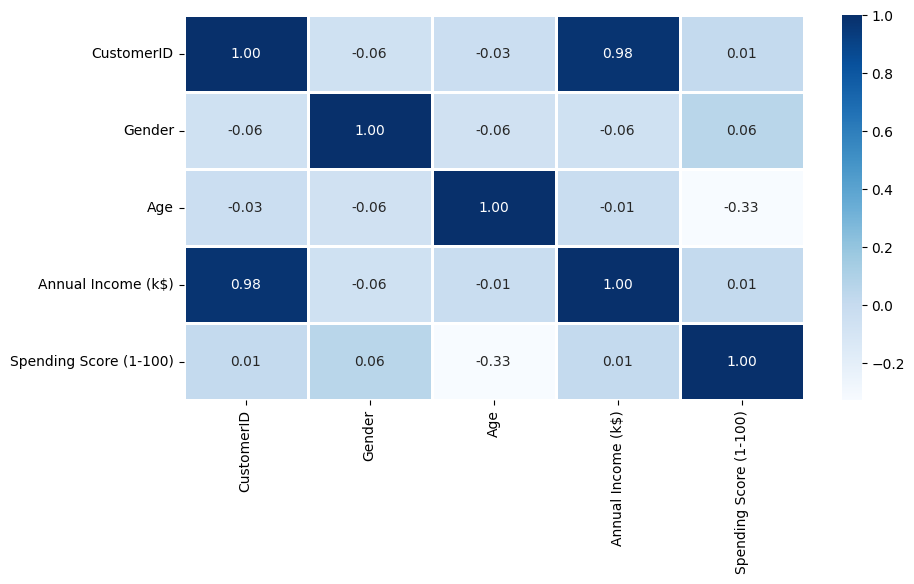

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))

gender_mapping = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].map(gender_mapping)

plt.figure(figsize=(10,5))
corr_target= df.drop("Spending Score (1-100)", axis=1)
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

In [ ]:
X=df.drop(['Age','CustomerID','Gender'],axis=1)
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


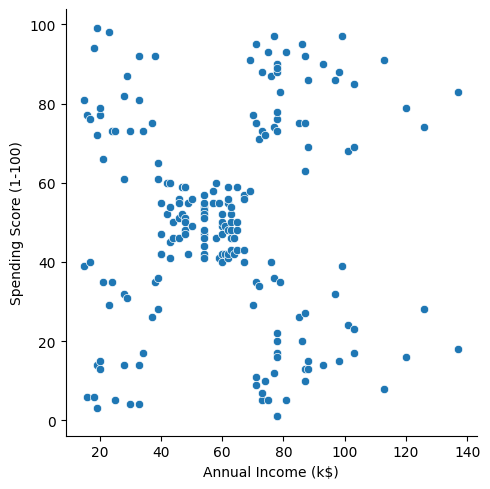

In [ ]:
sns.relplot( x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

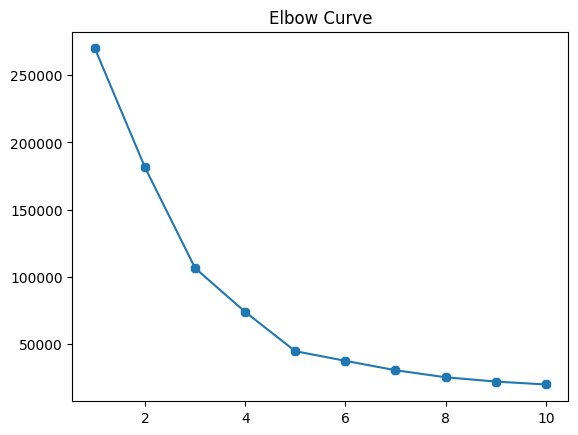

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,n_init=10)
label=kmeans.fit_predict(X)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [ ]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


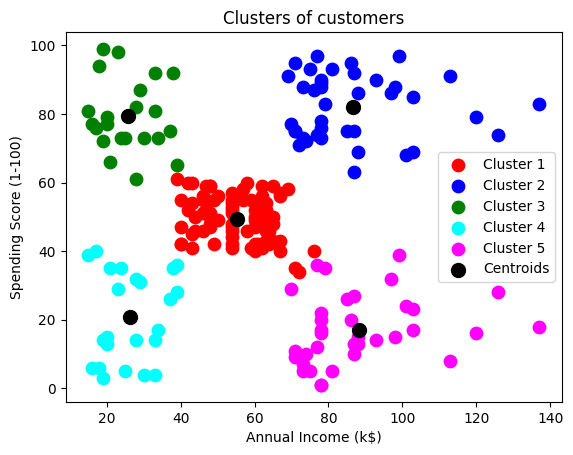

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
                   'Spending Score (1-100)'],
            s=80, c='red', label='Cluster 1')

plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1, 'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2, 'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3, 'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4, 'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
            c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
X=df.drop(['Gender','CustomerID'],axis=1)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


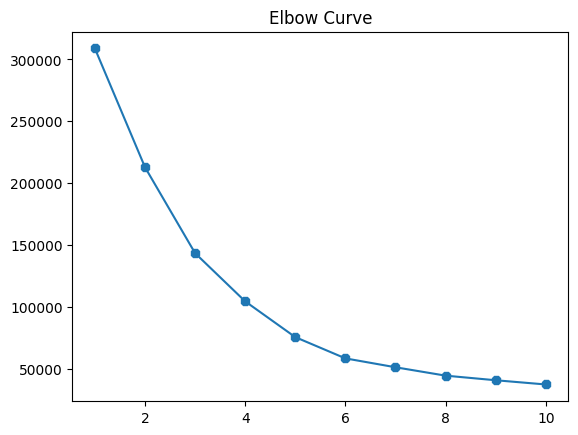

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,n_init=10)
label=kmeans.fit_predict(X)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
print(kmeans.cluster_centers_)

[[42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.27272727 25.72727273 79.36363636]
 [45.2173913  26.30434783 20.91304348]]


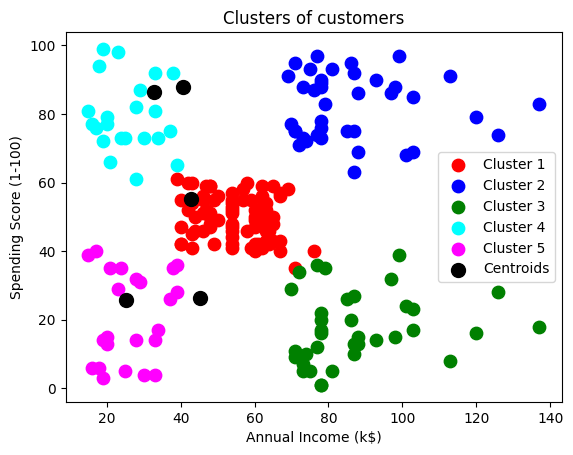

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0, 'Spending Score (1-100)'], s=80, c='red', label='Cluster 1')
plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1, 'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2, 'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3, 'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4, 'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
